# 1. Importing libraries

In [24]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/user/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# 2. Tokenisation

In [25]:
myfile = open('Key_events.txt', encoding='utf-8')

In [26]:
# Import txt file

with open('Key_events.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [27]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /Users/user/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonate Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1World at the beginning of the century1.1.1"The war to end all wars": World War I (1914–1918)1.2Spanish flu1.2.1Russian Revolution and communism1.3Between the wars1.3.1Economic depression1.3.2The rise of dictatorship1.4Global war: World War II (1939–1945)1.4.1The war in Europe1.4.2Blitzkrieg1.4.3Operation Barbarossa1.4.4Turning tides1.4.5Operation Overlord1.4.6Final days1.4.7The war in the Pacific1.4.7.1Background1.4.8Japanese Expansion1.4.9Allied offens

In [29]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pagesSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1World', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914–1918', ')', '1.2Spanish', 'flu1.2.1Russian', 'Revolution', 'and', 'communism1.3Between', 'the', 'wars1.3.1Economic', 'depression1.

# 3. Frequency distribution

In [30]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4911 samples and 21419 outcomes>


In [31]:
dist_words.most_common(10)

[('.', 1313),
 ('the', 1134),
 (',', 980),
 ('of', 625),
 ('and', 410),
 ('to', 333),
 ('[', 309),
 (']', 309),
 ('in', 303),
 ('The', 302)]

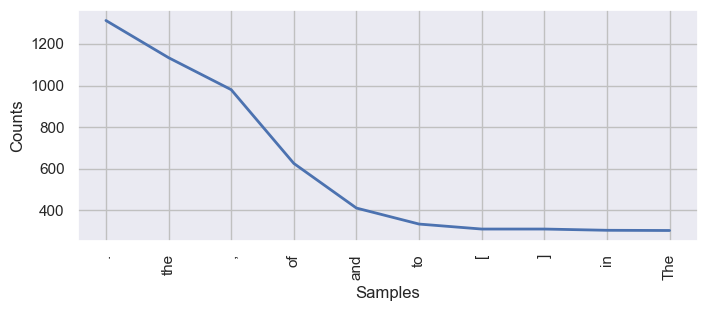

In [32]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

# 4. Removing stop words 

In [33]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

In [34]:
# Removing stopwords in words

Filtered_words = [] # creates an empty list
for word in tokenized_word:
      if word not in stoplist:
           Filtered_words.append(word)

In [35]:
# Create a new FreqDist for filtered–words

Dist_words_filter = FreqDist(Filtered_words)
print (Dist_words_filter)

<FreqDist with 4807 samples and 16633 outcomes>


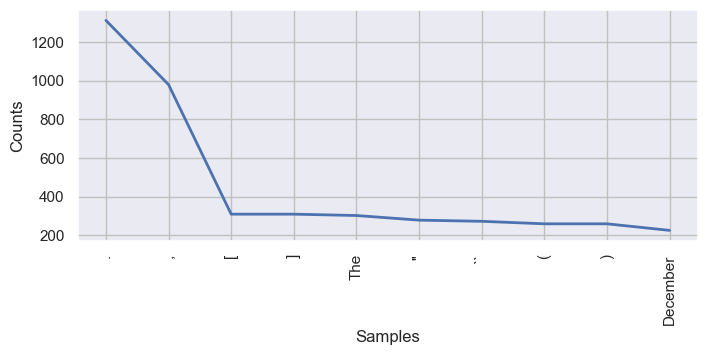

In [36]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
Dist_words_filter.plot(10,cumulative = False)
plt.show()

# 5. Removing punctuation

In [37]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(Filtered_words))

In [38]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print (tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pagesSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Spanish', 'flu', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', '

In [39]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

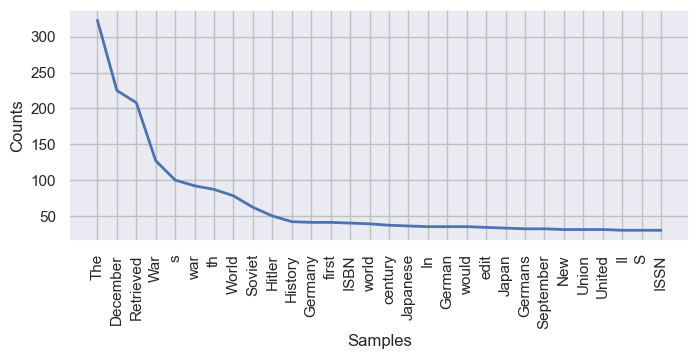

In [40]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

The frequency distribution finally shows meaningful words. The list is still not ideal, because single letters ('s') and Roman numbers ('II') are still counted, but I finally can tell the most commonly refered countries: SSRS, Germany, and Japan. It makes me think that the current country list does not include SSRS, so the country tagging might be more complicated than I initially thought.

# 6. POS tagging

In [41]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The', 'th']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

In [42]:
%%time
text = TextBlob(str(filtered))

CPU times: user 2.95 ms, sys: 12 μs, total: 2.96 ms
Wall time: 2.95 ms


In [43]:
text

TextBlob("['Key', 'events', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pagesSearchSearchAppearanceDonateCreate', 'accountLog', 'inPersonal', 'toolsDonate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'centuryToggle', 'Historic', 'events', 'century', 'subsection', 'World', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Spanish', 'flu', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japa

In [44]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/user/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [45]:
tags_list = text.tags

In [46]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSpecial", 'NNP'),
 ("'", 'POS'),
 ("'pagesSearchSearchAppearanceDonateCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'toolsDonate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),


In [47]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top10=df_t.nlargest(10, 'Words')

# 7. Creating bar plots

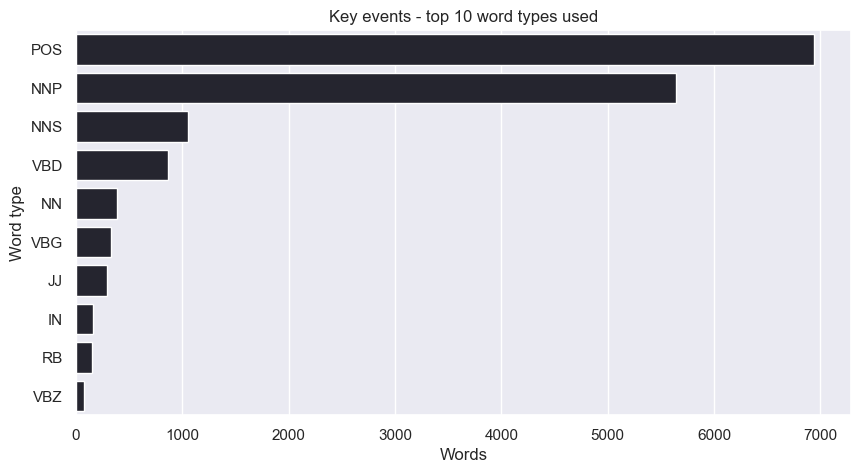

In [48]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
      sns.barplot(x = "Words", y = "Word type",
     saturation = 0.9, data = top10).set_title("Key events - top 10 word types used")


NOUNS

In [49]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Words", "Occurrences"]
x = df.groupby('Words').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15 = y.nlargest(15, 'Occurrences')

In [50]:
top15

,Words,Occurrences
298,'December,225
1294,'War,127
2657,'war,92
1344,'World,78
1141,'Soviet,62
554,'Hitler,50
553,'History,42
1829,'first,41
580,'ISBN,40
2684,'world,39


Text(0.5, 1.0, 'Key events - most frequently used nouns')

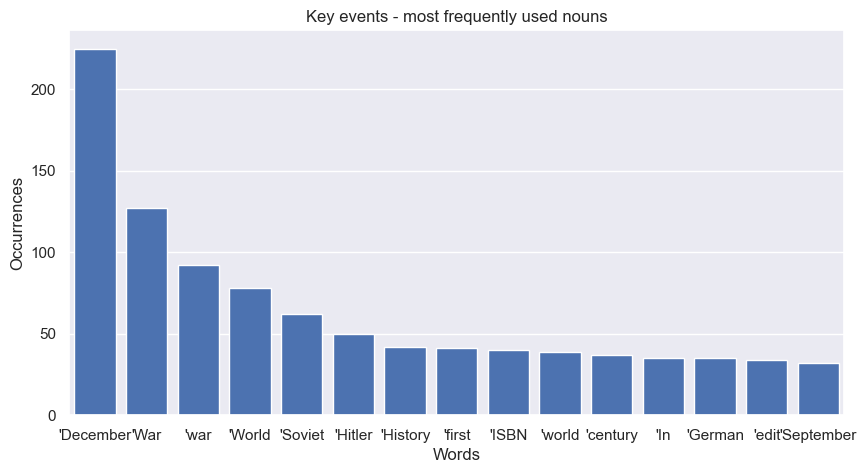

In [51]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.barplot(x="Words", y="Occurrences",
      saturation=1.0,  # Increase saturation for more intense colors
      data=top15).set_title("Key events - most frequently used nouns")

VERBS

In [52]:
df1 = df_text[(df_text['Word type'] == "VBD") | (df_text['Word type'] == "VBG") | (df_text['Word type'] == "VBZ")]
df1.columns = ["Words", "Occurrences"]
x = df1.groupby('Words').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
Top15 = y.nlargest(15, 'Occurrences')

In [53]:
Top15

,Words,Occurrences
60,'Retrieved,208
81,'United,31
63,'S,29
73,'States,26
0,'Allied,19
344,'led,15
1,'Archived,14
543,'used,13
340,'launched,12
308,'including,10


Text(0.5, 1.0, 'Key events - most frequently used verbs')

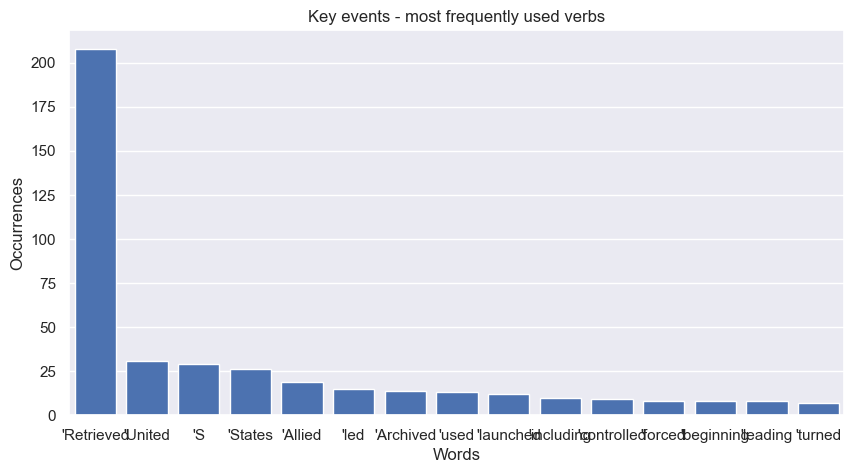

In [54]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.barplot(x="Words", y="Occurrences",
      saturation=1.0,  # Increase saturation for more intense colors
      data=Top15).set_title("Key events - most frequently used verbs")

ADJECTIVES

In [55]:
df2 = df_text[(df_text['Word type'] == "JJ")]
df2.columns = ["Words", "Occurrences"]
x = df2.groupby('Words').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
TOP15 = y.nlargest(15, 'Occurrences')

In [56]:
TOP15

,Words,Occurrences
27,'Japanese,36
2,'American,24
5,'Atlantic,13
19,'Guardian,10
13,'Chinese,7
42,'Russian,7
1,'African,6
106,'political,6
7,'Baltic,5
94,'medical,5


Text(0.5, 1.0, 'Key events - most frequently used adjectives')

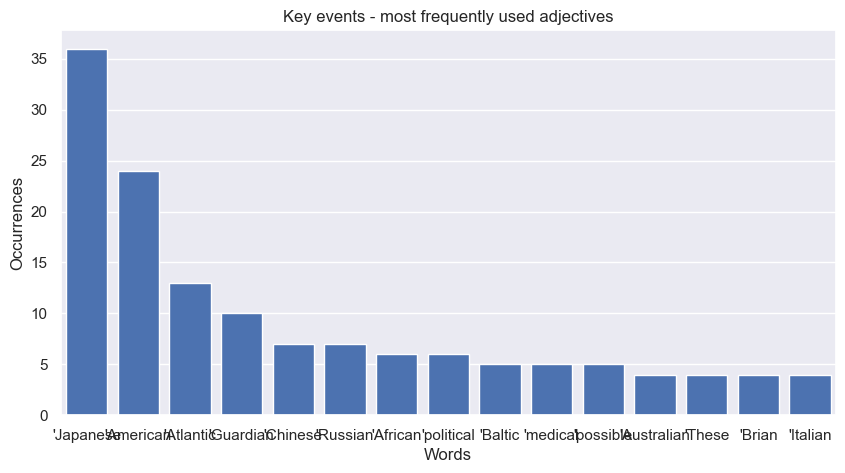

In [57]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.barplot(x="Words", y="Occurrences",
      saturation=1.0,  # Increase saturation for more intense colors
      data=TOP15).set_title("Key events - most frequently used adjectives")

The most interesting finding is that I wouldn't have thought that adjectives are so important, and it is one of the most informative graphs so far. Very interesting!

# 8. Frequency of mention

In [58]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonate Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Historic events centuryToggle Historic events century subsection World beginning century war end wars World War I Spanish flu Russian Revolution communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External links

In [81]:
# Create a count for the main countries

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [60]:
all_counts

Counter({'December': 225,
         'Retrieved': 208,
         'War': 127,
         'war': 92,
         'World': 78,
         'Soviet': 62,
         'Hitler': 50,
         'History': 42,
         'Germany': 41,
         'first': 41,
         'ISBN': 40,
         'world': 39,
         'century': 37,
         'Japanese': 36,
         'In': 35,
         'German': 35,
         'would': 35,
         'edit': 34,
         'Japan': 33,
         'Germans': 32,
         'September': 32,
         'New': 31,
         'Union': 31,
         'United': 31,
         'II': 30,
         'S': 30,
         'ISSN': 30,
         'also': 29,
         'became': 29,
         'August': 29,
         'Europe': 28,
         'July': 28,
         'end': 27,
         'U': 26,
         'States': 26,
         'A': 26,
         'nuclear': 26,
         'June': 25,
         'Battle': 25,
         'history': 24,
         'American': 24,
         'April': 24,
         'October': 24,
         'com': 24,
         'new': 23,
   

In [65]:
chars = pd.read_csv("Countries.csv", index_col = 0)

In [66]:
chars

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
...,...
190,Venezuela
191,Vietnam
192,Yemen
193,Zambia


In [67]:
char_list = chars['Country'].to_list()

In [68]:
dict_of_counts = {d : all_counts[d] for d in char_list}

In [69]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia and Herzegovina': 0,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 1,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 'China': 10,
 'Colombia': 0,
 'Comoros': 0,
 'Congo': 2,
 'Congo (Democratic Republic)': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czechia': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 'Eswatini': 0,
 'Ethiopia': 0,
 'Fiji': 0,
 'Finland': 4,
 'France': 17

In [70]:
# Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [71]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,13,0,0,0


In [72]:
df = df.transpose().reset_index()

In [73]:
df.dtypes

index    object
0         int64
dtype: object

In [74]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
190,Venezuela,0
191,Vietnam,13
192,Yemen,0
193,Zambia,0


In [75]:
df.rename(columns = {"index":"Country", 0:"Times mentioned"}, inplace = True)

In [76]:
df

,Country,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
190,Venezuela,0
191,Vietnam,13
192,Yemen,0
193,Zambia,0


In [77]:
df.shape

(195, 2)

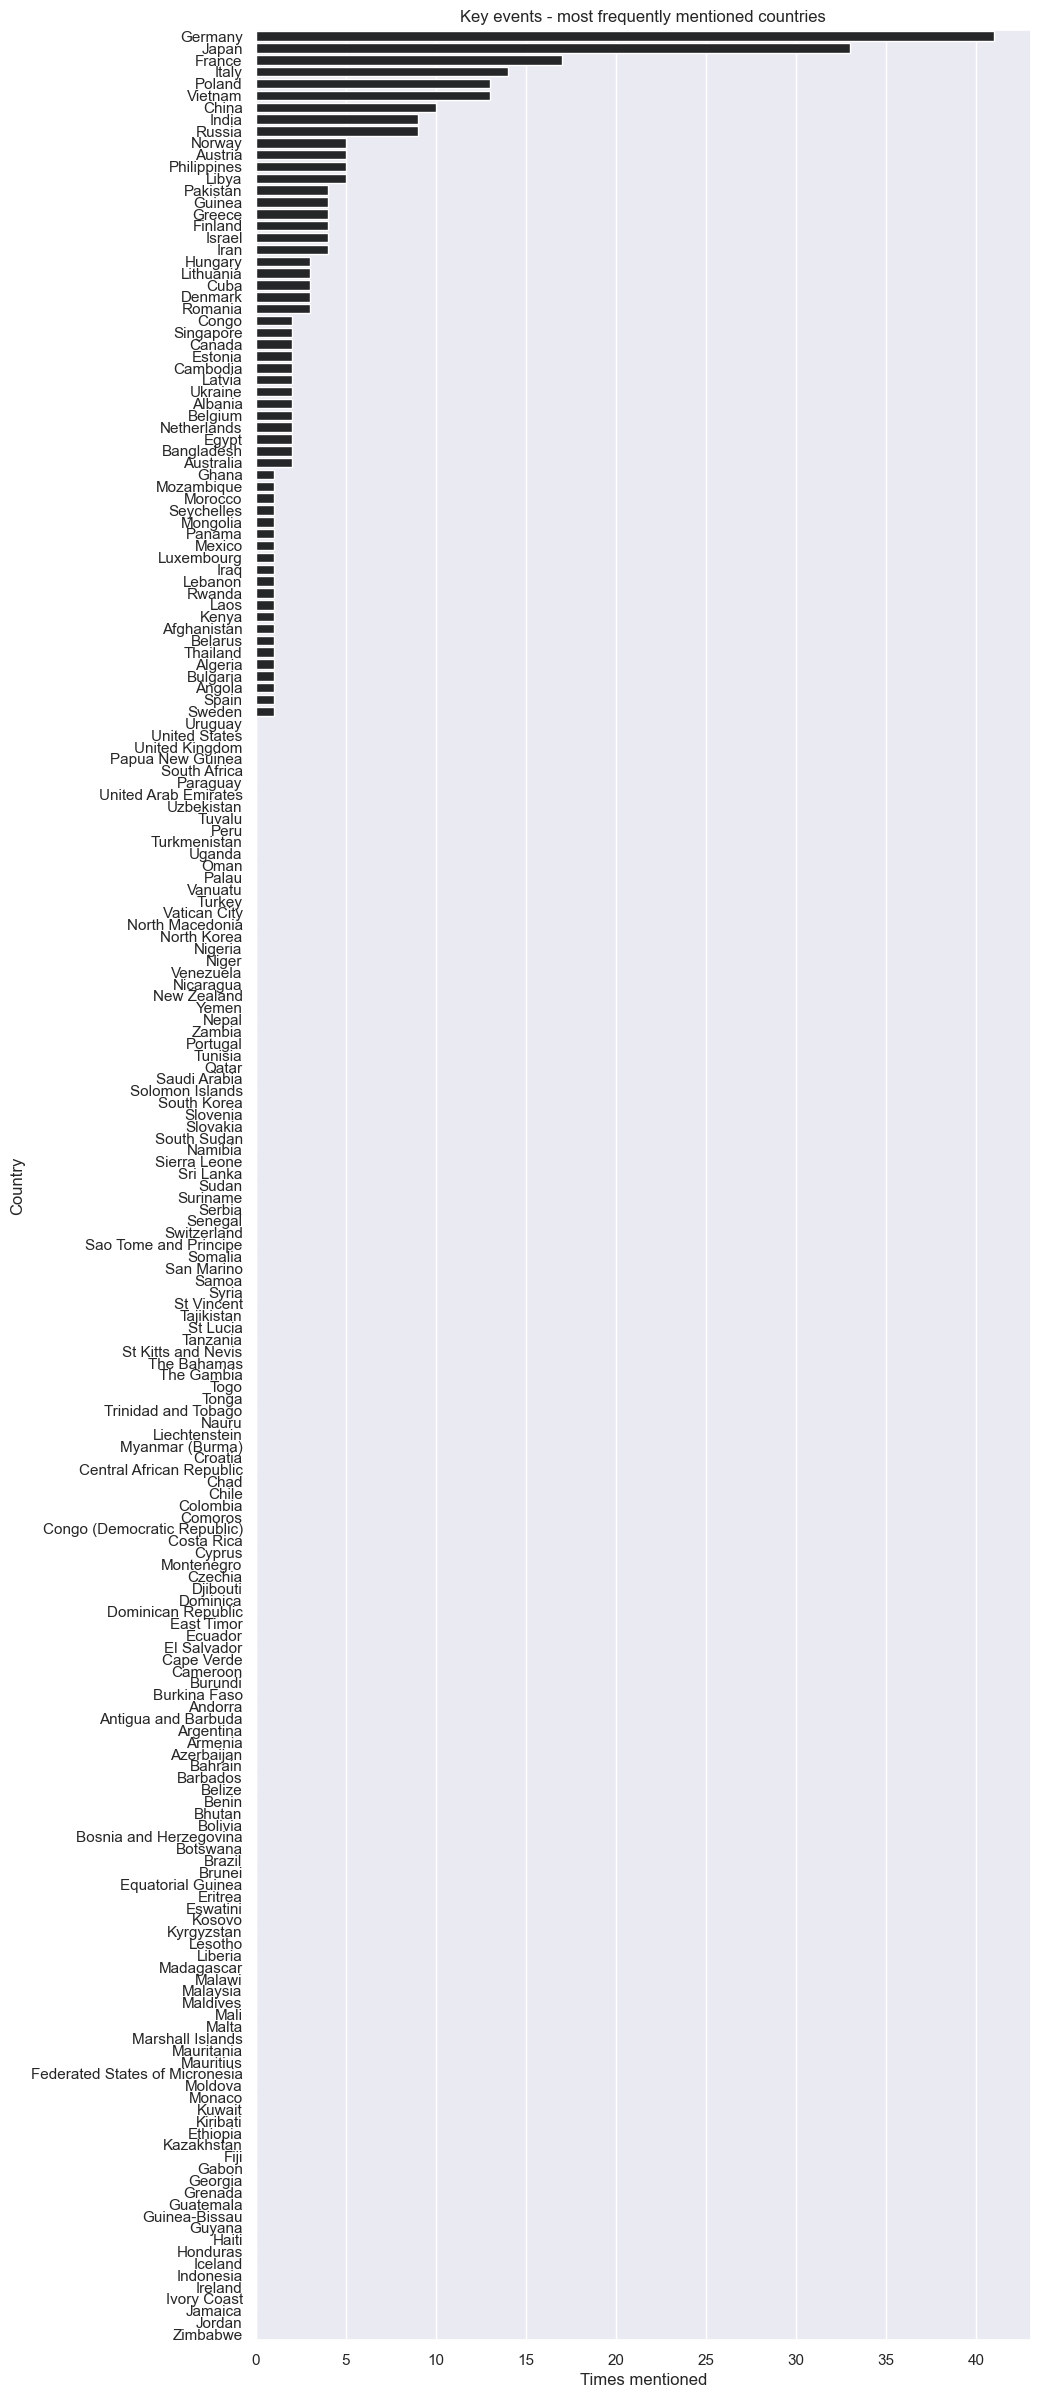

In [80]:
plt.figure(figsize=(10, 30))
with sns.dark_palette("#79C", 27):
    sns.barplot(x = "Times mentioned", y = "Country",
    saturation=0.9, data = df.sort_values("Times mentioned", ascending = False)).set_title("Key events - most frequently mentioned countries")

The majority of countries are not mentioned even once, which is not surprising. Top 3 are Germany, Japan and France, which is surprising. It makes me think that I need to add SSRS as alias to Russia, and US to United States, and UK to United Kingdom.